In [1]:
import os

if "jbook" in os.getcwd():
    os.chdir(os.path.abspath(os.path.join("../..")))
import warnings

warnings.filterwarnings("ignore")

# AppVoCAI Data Quality Assessment
It's well established, the performance, reliability, accuracy, and validity of AI and machine learning models is limited by the quality and integrity of the training data. Systematic analysis of the data quality is an essential precursor to downstream cleaning, analysis and modeling. In this section, we evaluate the quality of the AppVoCAI dataset along eight dimensions:

1. **Completeness**: The degree to which all required data values are present. The completeness metric is defined as:
$$X_{Completeness}=\frac{N_c}{N}$$ 
where $N_c$ is the number of complete rows, and $N$ is the total number of rows. 

2. **Validity**: Validity refers to the degree to which the data reflect valid data. In this context, we consider the validity of rating values in [1,5], as well as review length outliers:
$$X_{Validity}=\frac{N_r}{N}*w_1 + \frac{N_o}{N}*w_2$$ 
where $N_r$ are the number of observations for which the rating is valid, $N_o$ are the non-outlier rows for review length, $N$ is the total number of observations, and $w_1=0.7$ and $w_2=0.3$ are weights assigned to each component based upon their importance to the analysis. 

3. **Uniqueness**: Uniqueness in the dataset is defined as:
$$X_{Uniqueness}=\frac{N_r}{N}*w_1+\frac{N_{id}}{N}*w_2$$
where $N_r$ is the number of unique reviews by app_id, $N_{id}$ is the number of unique review identifiers, $N$ is the total number of observations, and $w_1=0.3$, and $w_2=0.7$ are weights reflecting the importance of each component to the integrity of the dataset.  

4. **Balance**: The degree to which sentiments are in balance across the dataset. Balance is computed as:
$$X_{Balance}=1-\frac{\sum_{i=1}^N|x_i-\bar{x}|}{N}$$
where $x_i$ is the sentiment for the $i^{th}$ observation, $\bar{x}$ is the average sentiment for the dataset, and $N$ is the total number of observations.

5. **Accuracy**: Accuracy reflects the degree to which the data represents real-world phenomena it is intended to describe. Noise in text, such as extraneous characters, introduces distortions that can affect analysis and modeling performance. We define the accuracy metric as:
$$X_{Accuracy}=1-\frac{N_n}{N}$$

where $N_n$ is the number of rows flagged for noise and $N$ is the total number of rows in the dataset. 

6. **Data Privacy**: Personally Identifiable Information (PII) in datasets raises a number of ethical, privacy, and legal concerns. Here, we measure the degree to which the data are free of PII such as URLs, phone numbers, and email addresses. 
$$X_{Data Privacy}=1-\frac{N_p}{N}$$
where $N_p$ is the number of observations containing PII, and $N$ is the number of observations in the dataset. 

7. **Interpretability**:  The degree to which data are in an appropriate language. Non-english app names and app reviews are flagged in the dataset, revealing separate measures of interpretability which are averaged as follows:
$$X_{Interpretability}=1-\frac{N_{ne}}{N}$$ 

where $N_{ne}$ is the number of rows with non-English app names or review text, and $N$ is the total number of observations.

8. **Text Quality**: Our text quality metric is a weighted sum of syntactic complexity measures and a perplexity-based coherence score to arrive at a quality score for each rating {ref}`appendix:tqa`. 

## Overall Data Quality Score
The overall data quality score is a weighted sum of the data quality dimensions, calculated as follows:

$$
\text{Overall Quality Score} = 0.10 \times X_{\text{Completeness}} + 0.15 \times X_{\text{Validity}} + 0.10 \times X_{\text{Uniqueness}} + 0.10 \times X_{\text{Balance}} + 0.15 \times X_{\text{Accuracy}} + 0.05 \times X_{\text{Data Privacy}} + 0.05 \times X_{\text{Interpretability}} + 0.30 \times X_{\text{Text Quality}}
$$

### Justification for Weights
1. **Completeness (10%)**: Ensures that a sufficient proportion of data values are present. While essential, its impact is balanced with other dimensions.
2. **Validity (15%)**: Critical for ensuring the integrity of numerical values like ratings and identifying outliers in review lengths, influencing analysis reliability.
3. **Uniqueness (10%)**: Maintains data integrity by verifying the distinctiveness of reviews and identifiers, though not as heavily weighted as other metrics.
4. **Balance (10%)**: Important for maintaining an unbiased distribution of sentiments across the dataset, reducing the risk of skewed analytical insights.
5. **Accuracy (15%)**: Essential for minimizing distortions caused by noise or extraneous characters in the text, preserving the fidelity of the data.
6. **Data Privacy (5%)**: Measures the presence of Personally Identifiable Information (PII) and ensures compliance with privacy standards. Although vital, it has a lower weight due to the focus on textual analysis.
7. **Interpretability (5%)**: Assesses the linguistic appropriateness of the data, such as ensuring reviews are in the correct language. This metric is important but weighted lower in comparison.
8. **Text Quality (30%)**: Given the focus on natural language processing, Text Quality receives the highest weight. This dimension emphasizes lexical richness, syntactical diversity, and coherence, which are paramount for accurately analyzing and interpreting complex textual data.



In [2]:
from discover.app.dqa import DQA
from discover.container import DiscoverContainer

## Dependency Container

In [3]:
container = DiscoverContainer()
container.init_resources()
container.wire(
    modules=[
        "discover.app.base",
    ],
)

In [4]:
dqa = DQA()

## Data Quality Analysis

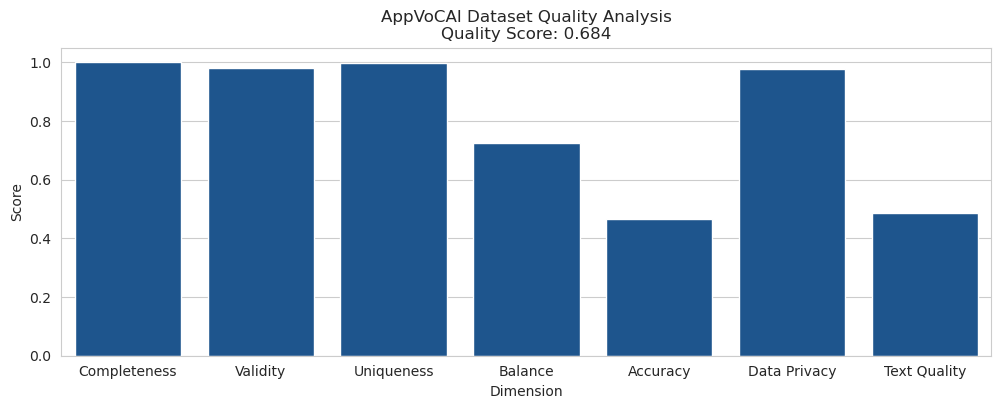

In [5]:
dqa.plot_quality()

This section highlights key areas where our data quality demands further scrutiny, emphasizing **Balance**, **Accuracy**, and **Text Quality** as focal points for improvement.

### 1. **Text Quality** (Score: Needs Significant Attention)
- **Current Status**: Scoring the lowest among all dimensions, Text Quality highlights serious concerns regarding the richness and diversity of our data. Deficiencies may include limited lexical variation, insufficient syntactic sophistication, or a lack of textual coherence.
- **Implications**: Poor text quality poses challenges for natural language processing tasks that require depth and nuance, potentially degrading model performance and insight generation. 
- **Next Steps**: Evaluate the distribution of text quality scores vis-a-vis quality score thresholds to identify the highest-quality reviews for modeling self-training and fine-tuning. 

### 2. **Accuracy** (Score: Needs Improvement)
- **Current Status**: The Accuracy score points to issues like noisy, inconsistent data. Examples could involve spelling errors, irregular sentence structures, or extraneous characters that interfere with data reliability.
- **Implications**: Inconsistent or error-prone data compromises the effectiveness of NLP models, leading to potential misinterpretations or unreliable outcomes.
- **Next Steps**:  Inspect the data, focusing on artifacts, extraneous characters, patterns and noise requiring treatment during the data cleaning stage.

### 3. **Balance** (Score: Moderate)
- **Current Status**: The Balance score is markedly lower compared to dimensions like Completeness, Validity, and Uniqueness.
- **Implications**: Imbalances within the dataset, such as uneven distributions of sentiment classes or user feedback, may bias analyses and affect the generalizability of models. These imbalances complicate efforts to build models that perform consistently across all data segments.
- **Next Steps**: Examine the sentiment distribution patterns to better understand where imbalances lie. Insights gleaned from this analysis will guide potential downstream data augmentation techniques, ensuring a more representative dataset for modeling.

Completeness, Validity, and Uniqueness exhibit strong performance, yet the focus shifts to Balance, Text Quality, and Accuracy. Let's take a closer look. 

## Quality Dimension Analysis
Let's dive in to explore each quality dimension, identifying key issues and the necessary interventions to ensure we deliver high-quality data for the upcoming exploratory and modeling stages.

### Text Quality
Aspect-based sentiment analysis (ABSA), a more fine-grained approach compared to traditional document or sentence-level sentiment analysis, predicts sentiment polarities for specific aspects or entities mentioned in the text. This method relies heavily on rich syntactic and lexical structures to accurately capture the sentiment nuances associated with different aspects. High-quality text that exhibits syntactic diversity and lexical complexity provides a fertile ground for ABSA, enabling models to discern and interpret relationships between words and phrases more effectively.

Moreover, texts that are syntactically diverse and lexically rich facilitate better extraction of semantic features, such as aspect terms and opinion expressions. These features are critical in tasks where understanding subtle sentiment shifts or complex opinion structures is paramount. Well-structured text with varied syntax aids in parsing dependency relationships, which models use to link sentiment-laden words to their corresponding aspects. Likewise, a broad lexical range enhances the model’s ability to generalize across different expressions of sentiment, capturing nuances that would otherwise be missed in simpler texts.

Additionally, high-quality text minimizes noise and ambiguity, leading to clearer sentiment patterns and more reliable sentiment predictions. The interplay between syntactic and lexical richness and ABSA performance underscores the importance of maintaining rigorous text quality standards throughout preprocessing and analysis. Thus, ensuring text quality not only bolsters sentiment analysis accuracy but also enhances the overall robustness of downstream NLP applications, such as customer feedback analysis, brand monitoring, and nuanced opinion mining.


,count,mean,std,min,25%,50%,75%,max
tqa_score,86705.0,0.488032,0.192402,0.0,0.390059,0.551376,0.615935,1.0


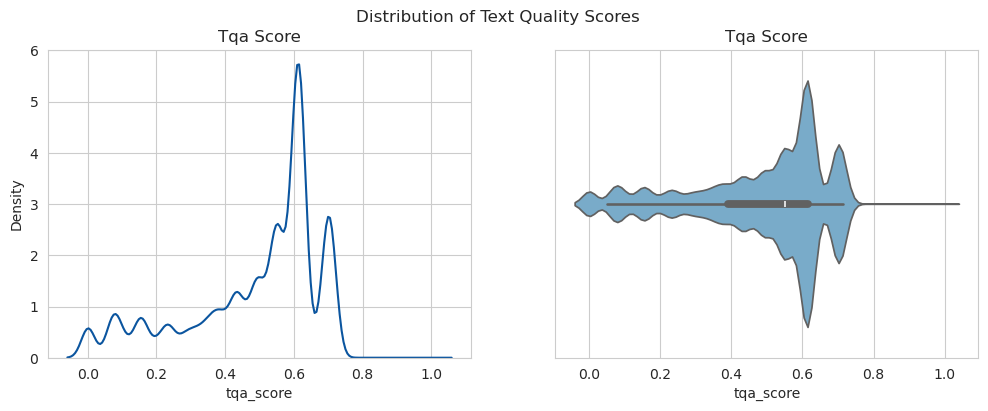

In [6]:
dqa.plot_text_quality()

The distribution of **Text Quality Assessment (TQA) scores** reveals important characteristics with implications for the ABSA modeling stage.

1. **Bimodal Distribution**: The density plot displays a **bimodal shape**, with two distinct peaks. One prominent cluster occurs in the mid-range of scores, while a second, sharper peak appears closer to the higher end. This suggests the presence of two main groups of text quality within the dataset: a substantial portion of moderately well-structured reviews and another segment of high-quality text.

2. **Long Tail on the Lower End**: The distribution stretches out toward the lower end, with a longer tail indicating a smaller but notable number of low-quality reviews. These lower scores represent text that may lack coherence, contain errors, or exhibit reduced linguistic complexity.

3. **Concentration of High-Quality Reviews**: The plots show a clear concentration of reviews around the higher peak, reinforcing the idea that there is a significant portion of high-quality text. This visually emphasizes that a focused sampling strategy can target these reviews to enhance self-training and fine-tuning efforts.

The bimodal distribution of Text Quality Scores implies the need for a strategic selection process when preparing data for self-training and fine-tuning. Ensuring that the model is exposed to a diverse yet high-quality set of reviews is crucial for optimal performance. Here’s why:

1. **Diversity**: The variation in text quality, as represented by the two peaks, suggests that the dataset contains a mix of both lower- and higher-quality reviews. By carefully selecting samples from both groups, we can expose the model to a wide range of linguistic structures and styles. This exposure enhances the model's robustness and its ability to generalize across diverse real-world text inputs.

2. **Quality**: At the same time, prioritizing higher-quality reviews ensures that the model learns from well-formed, coherent text. This is especially important for fine-tuning, where the goal is to refine the model’s understanding and boost performance on specific NLP tasks. By incorporating quality text into the training set, we can strike a balance between maintaining linguistic diversity and promoting strong language comprehension.

3. **Self-Training Implications**: When leveraging self-training techniques, selecting a balanced subset of text data—capturing both the richness of high-quality examples and the linguistic challenges of lower-quality text—can improve the model's ability to self-correct and learn effectively from its own predictions.

4. **Fine-Tuning Strategy**: For fine-tuning, it may be beneficial to apply a filtering mechanism that emphasizes text quality, ensuring the model is polished on the best possible data. This targeted approach can help refine the model’s performance, particularly for tasks that are sensitive to text coherence and fluency.

Overall, this TQA score analysis suggests that a hybrid strategy combining both **quality filtering** and **diversity preservation** is key to building models that are not only accurate but also adaptable to real-world, varied text data. Let me know if you'd like to discuss how to implement this strategy or explore any additional aspects!   

### Accuracy
In the context of NLP and Aspect-Based Sentiment Analysis (ABSA), accuracy refers to the degree to which the text faithfully represents real-world linguistic structures and meanings. Previously, we identified seven facets of *harmful noise*—artifacts that either lack meaningful content or obscure the intended message of the text. These noise elements can degrade the quality and interpretability of the data, ultimately impacting model performance.

The following reveals the extent to which these noise artifacts are present in the dataset.

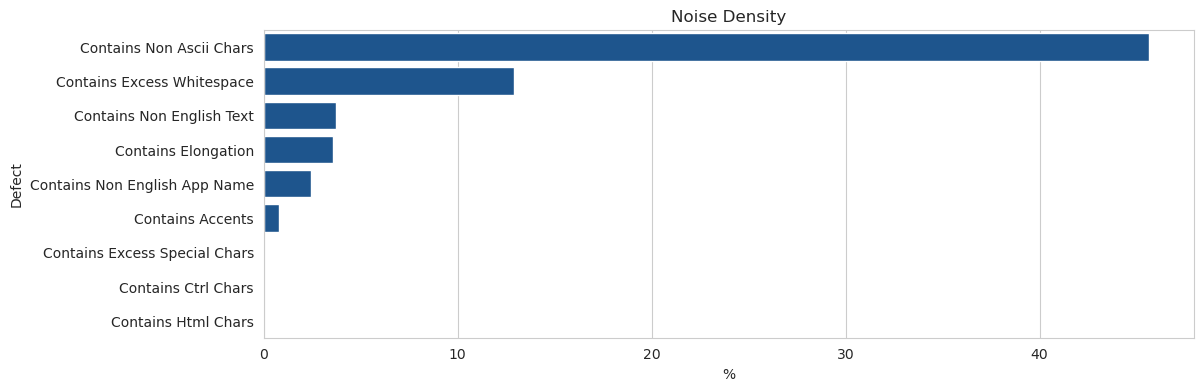

In [7]:
dqa.plot_noise()

The most prevalent issues in the dataset include **non-ASCII characters** and **excess whitespace**, followed by a smaller percentage of non-English text, text elongation, accented characters, special characters, control characters, and HTML characters. 

### Key Observations

1. **Prevalence of Non-ASCII Characters**:
   - **Highest Density**: Non-ASCII characters account for the largest noise category, affecting over **40%** of the data. These characters include emojis, symbols, and elements from non-Latin scripts, making them critical to text analysis, especially for sentiment-related tasks.
   - **Nuanced Handling Required**: Non-ASCII characters are not mere noise; they often convey important context. For example, **emojis** can reflect strong emotional sentiment, while non-Latin script characters are vital for accurately representing multilingual text. For transformer models, which are well-equipped to handle diverse character sets, careful consideration must be given to retain these elements rather than filtering them out.

2. **Excess Whitespace**:
   - **Significant Impact**: Excess whitespace affects over **10%** of the dataset. While this type of noise does not influence meaning, it disrupts text formatting and consistency. Removing excess whitespace is a straightforward preprocessing task that enhances data quality without altering semantic content.

3. **Non-English Text**:
   - **Linguistic and Semantic Complexity**: The presence of non-English text introduces an additional layer of complexity. Depending on the goals of the analysis, this content may need to be preserved for multilingual modeling or excluded if the focus is on a specific language. Handling non-English text requires a context-specific approach to ensure data relevance.

4. **Other Noise Types**:
   - **Text Elongation and Accents**: These features, though less prevalent, carry meaning in many contexts. Text elongation (e.g., “sooo good”) emphasizes sentiment or emphasis, particularly in informal communication, while accented characters are crucial for representing non-English words accurately.
   - **Non-English App Names**: These may add to the dataset's complexity and need to be carefully evaluated for their relevance to the analysis.
   - **Special, Control, and HTML Characters**: These defects are relatively rare but can interfere with text parsing. HTML tags and control characters will be sanitized or replaced to maintain text clarity.

### Implications for Data Processing

A **one-size-fits-all** approach to noise removal is inadequate given the complexity and potential value of certain noise elements:
- **Non-ASCII Characters**: Rather than removing these elements indiscriminately, it is crucial to evaluate their relevance to the task at hand. Emojis, for instance, can enrich sentiment analysis, while non-Latin scripts are indispensable for multilingual text processing.
- **Non-English Text**: A strategic approach is needed to either retain or filter this content based on the scope of the analysis. Multilingual NLP applications would benefit from retaining and properly labeling these data points.
- **Whitespace and Control Characters**: These can be safely normalized or eliminated, as they generally do not contribute semantic value.
- **Text Elongation and Accents**: Handling these features contextually can preserve emphasis and linguistic nuance. Elongation may enhance sentiment analysis, and accents are important for accurate representation in multilingual datasets.

The diversity and complexity of noise in this dataset highlight the need for a **carefully tailored preprocessing strategy**. While standard cleaning practices are effective for simple noise like whitespace, handling non-ASCII, accented characters, and non-English text demands a more thoughtful approach. By preserving meaningful elements, especially for transformer-based models, we can ensure that the data retains its richness and supports robust natural language understanding.

### Class Imbalance
Class imbalance, in which one or multiple classes (**minority classes** ) are considerably less frequent than other **majority classes** {cite}`henningSurveyMethodsAddressing2022`, tend to bias models towards the majority class(es), neglecting the minority class(s). A common problem in NLP, class imbalance often leads to underperformance and misclassification of the minority class. Let's examine the frequencies of sentiments in our dataset. 

,count,unique,top,freq
dqp_sentiment,86705,5,Very Positive,24090


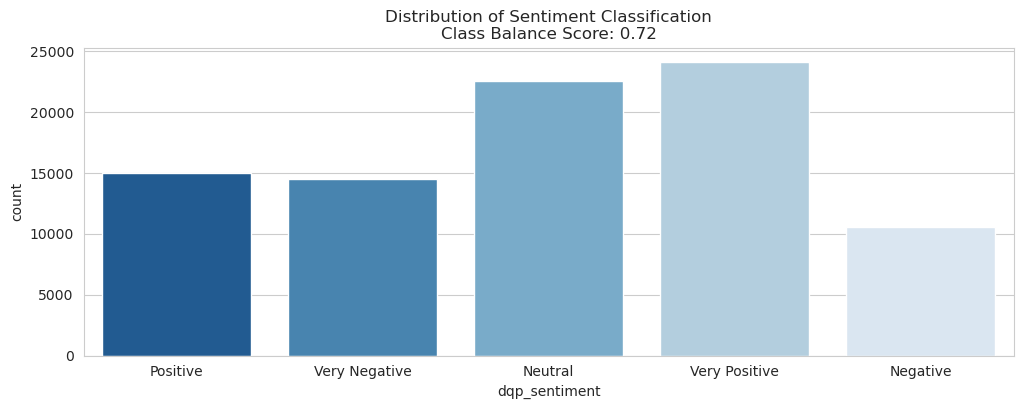

In [8]:
dqa.plot_balance()

The distribution of sentiment classifications has a class balance score of **0.72**, suggestig a moderate imbalance among the classes.

### Class Balance Observations:
1. **Dominant Classes**: The classes **Neutral** and **Very Positive** have the highest counts, each close to 25,000. This indicates that a significant portion of the dataset falls into these two sentiment categories, which may skew the model's learning focus toward these sentiments.
2. **Underrepresented Class**: The **Negative** class is clearly the least represented, with a count much lower than the other classes. This imbalance could lead to challenges in accurately predicting negative sentiment, as the model may struggle to learn sufficient features for this underrepresented category.
3. **Moderate Classes**: The **Positive** and **Very Negative** classes have intermediate counts, providing a reasonable representation but still less than the Neutral and Very Positive classes.

### Implications for Model Performance:
- **Potential Bias**: The imbalance, particularly the underrepresentation of the Negative class, could introduce bias into your sentiment analysis model, making it more likely to misclassify or underpredict negative sentiments.
- **Mitigation Strategies**: To address this class imbalance, consider techniques like oversampling the Negative class, undersampling the dominant classes, or using class-weighted loss functions to ensure the model pays equal attention to all sentiment categories.
- **Data Augmentation**: Another approach could be augmenting the dataset with additional negative sentiment examples if possible, to improve the representation of underrepresented classes.

Overall, while the class balance score of 0.72 indicates a moderate imbalance, special attention will be given to ensuring the model can generalize well across all sentiment classes, especially the underrepresented ones.

### Data Privacy
The presence of personally identifiable information (PII) in AI datasets is a significant concern with both ethical and legal implications. Removing PII from analysis and training data is essential to mitigate risks of **privacy violations, data breaches, and non-compliance with regulations such as GDPR or CCPA**. Ensuring that PII is properly handled and anonymized safeguards user confidentiality, upholds data ethics standards, and protects organizations from legal liabilities. Moreover, it fosters trust with users and stakeholders, reinforcing the responsible use of AI technologies.

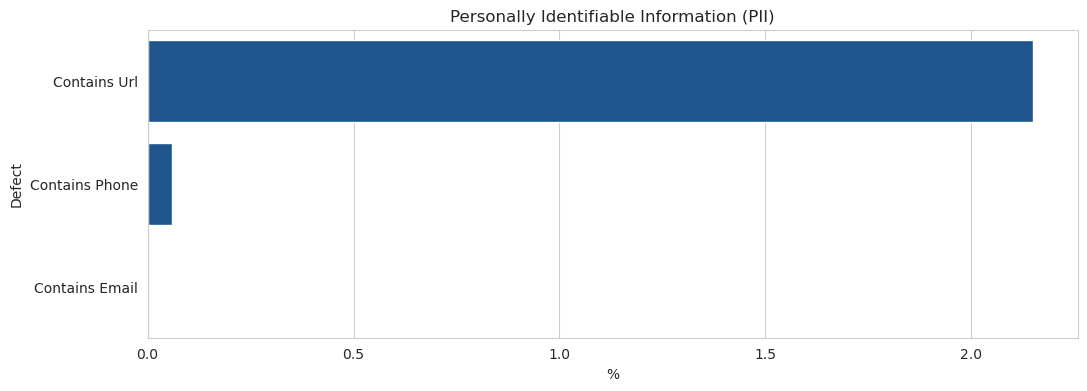

In [9]:
dqa.plot_privacy()

The chart provides an overview of the presence of different types of **Personally Identifiable Information (PII)** in the dataset. Here’s an analysis of the findings:

### Key Observations:
1. **High Prevalence of URLs**: The most significant PII issue is the presence of URLs, which appear in over 2% of the data. URLs can contain sensitive or identifying information, such as user profiles or specific website interactions. This prevalence underscores the need for targeted strategies to detect and remove or anonymize URLs to protect user privacy.

2. **Moderate Presence of Phone Numbers**: The presence of phone numbers is notably lower than URLs but still represents a meaningful percentage of the data. Phone numbers are highly sensitive, and even a small amount of this data can pose serious privacy risks. Ensuring these are effectively identified and removed is critical for compliance and ethical data handling.

3. **Absence or Minimal Presence of Email Addresses**: Email addresses are either completely absent or present at a negligible level, as suggested by the empty or near-zero bar. While this is encouraging from a privacy standpoint, it’s still important to have mechanisms in place to identify and handle any email addresses that might appear in future data.

### Implications:
- **Focus on URL Removal**: The high prevalence of URLs necessitates robust mechanisms for detecting and anonymizing or removing them from the dataset. Special consideration will be given to parsing and handling URLs effectively to prevent any residual identifying information.
- **Stringent Measures for Phone Numbers**: Although less common, phone numbers will be treated with heightened sensitivity. Incorporating regex patterns or other detection methods for comprehensive coverage is essential.
- **Preparedness for Email Detection**: Even though emails appear to be minimal, maintaining vigilant detection measures ensures that any future data additions do not inadvertently expose sensitive information.

The chart highlights the importance of prioritizing PII mitigation strategies, especially for URLs and phone numbers, to maintain data privacy and integrity. 

### Validity and Outliers
In the context of data quality, **validity** refers to the extent to which the data accurately and appropriately represents the phenomenon it is intended to capture. One critical aspect of validity in text-based datasets is the **length of review text**, where significant deviations from typical lengths—whether extremely short or excessively long—can signal potential data quality issues.

Outliers in review text length can indicate a range of scenarios, both valid and invalid:

- **SPAM**: Reviews that are unusually short or long may be automated or spam content, designed to manipulate review scores or introduce irrelevant information, making them likely candidates for removal.
- **Entry Mistakes**: Typos, accidental submissions, or formatting errors can lead to outliers that misrepresent genuine user feedback, warranting correction or exclusion.
- **Valid Anomalies**: In some cases, outliers may represent legitimate, meaningful content that simply falls outside the norm. For instance, an in-depth, well-articulated review might be much longer than average but still valuable and accurate.

The goal of outlier analysis is to differentiate between **invalid outliers**, which reflect errors or noise that compromise data quality, and **valid outliers**, which offer unique or insightful information. Addressing invalid outliers helps maintain the dataset’s integrity and ensures that models can generalize effectively. At the same time, preserving valid outliers ensures that valuable, albeit unconventional, data points contribute to a richer and more comprehensive analysis.

,count,mean,std,min,25%,50%,75%,max
review_length,5862.0,142.724156,71.187036,90.0,102.0,120.0,157.0,1016.0


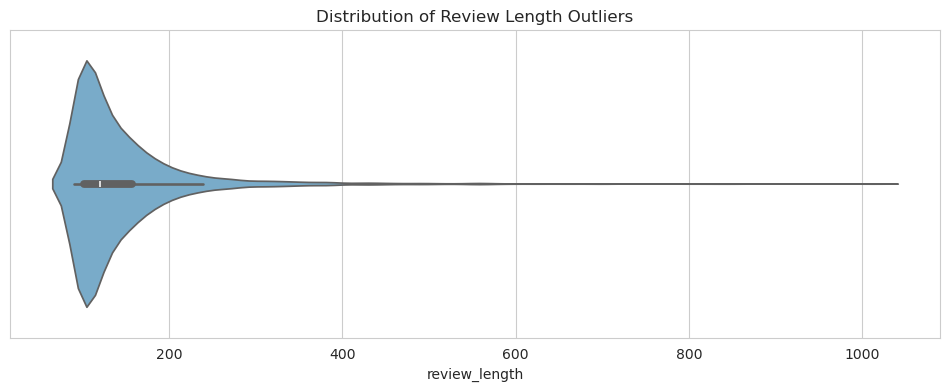

In [10]:
dqa.plot_validity()

The statistics provided for the **review_length** feature give insight into the distribution and potential presence of outliers:

### Key Observations:
1. **Central Tendency**: 
   - The **mean review length** is 142.7 characters, while the **median (50th percentile)** is 120 characters. The difference between the mean and median suggests a right-skewed distribution, indicating the presence of longer reviews that pull the average up.
  
2. **Spread and Variability**:
   - The **standard deviation** is relatively high at 71.2 characters, reflecting considerable variability in review lengths. This wide spread indicates that there are substantial differences in how long reviews tend to be, with some being much longer than others.
  
3. **Range and Potential Outliers**:
   - The minimum review length is 90 characters, while the maximum is a striking 1016 characters. Given that the 75th percentile value is 157 characters, reviews significantly longer than this (towards the upper end of the range) are likely outliers. These extreme values may represent detailed, comprehensive reviews that deviate from the norm or potential issues such as spam or overly verbose entries.

### Implications for Data Quality:
- **Identifying Outliers**: Reviews that are much longer than the 75th percentile (e.g., those closer to or exceeding 1000 characters) will be flagged for further examination. These could either be valid, detailed reviews or invalid entries, such as spam or irrelevant content.
- **Handling Strategy**: 
  - **Invalid Outliers**: If these outliers are found to be spam, irrelevant, or errors, they will be removed or corrected to improve the overall data quality and ensure model reliability.
  - **Valid Outliers**: If these longer reviews provide valuable and legitimate feedback, they will be retained, as they can offer important insights for tasks like aspect-based sentiment analysis.

Overall, the distribution suggests a need for targeted outlier analysis to distinguish between useful and problematic reviews, ensuring that data quality is maintained without sacrificing meaningful information.

In [ ]:
outliers = dqa.get_defects(defect="outlier")

TypeError: '>' not supported between instances of 'str' and 'int'

### Summary of Data Quality Analysis
The Data Quality Assessment identified key problem areas, including **Balance**, **Accuracy**, and **Text Quality**. Each of these dimensions presents unique challenges with implications for subsequent analysis and modeling. Imbalances in the data may lead to biased outcomes, inaccuracies could disrupt model performance, and lower text quality threatens the linguistic richness needed for robust NLP tasks.

In the next section, we transition to the **Data Cleaning** phase, where we will apply targeted strategies to mitigate these issues, ensuring that the dataset is well-prepared for reliable and effective modeling.
